In [1]:
import sys
sys.path.append("..")
from blog_tools import data
import matplotlib.pyplot as plt
import phate
import scprep

In [2]:
data_loaders = data.__all__

/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:895: RuntimeWarning: divide by zero encountered in true_divide
  pdx = (pdx.T / bandwidth).T
/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:895: RuntimeWarning: invalid value encountered in true_divide
  pdx = (pdx.T / bandwidth).T


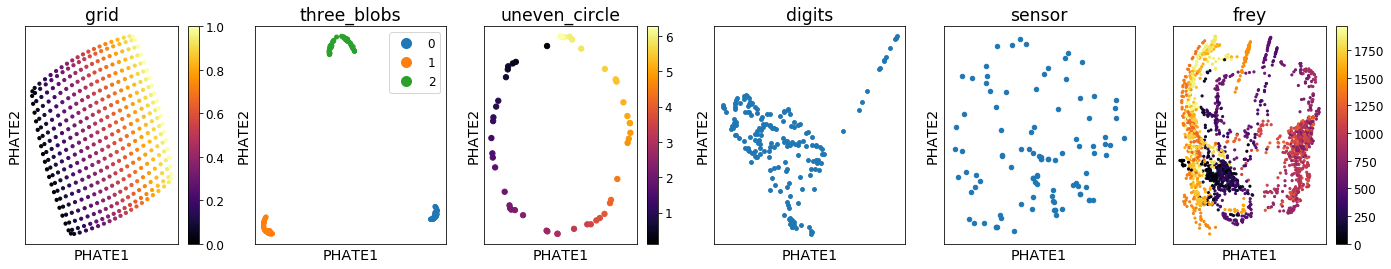

In [3]:
fig, axes = plt.subplots(1, len(data_loaders), figsize=(len(data_loaders)*4, 4))
for loader, ax in zip(data_loaders, axes):
    dataset = loader()
    knn_dist = knn_dist='precomputed' if dataset.is_graph else 'euclidean'
    Y = phate.PHATE(knn_dist=knn_dist, verbose=0).fit_transform(dataset.X)
    scprep.plot.scatter2d(Y, c=dataset.c, ticks=False, label_prefix="PHATE", ax=ax,
                         title=dataset.name)